<a href="https://colab.research.google.com/github/Juno-Maria-Joseph/OIBSIP/blob/main/Predicting_House_Prices_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting House Prices with Linear Regression**



In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Pandas DataFrame
hu_df = pd.read_csv('/content/Housing.csv')

In [ ]:
hu_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
hu_df.shape

(545, 13)

In [ ]:
hu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
hu_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
hu_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

**Data Cleaning**

In [ ]:
# Checking Null values
hu_df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Detecting Outliers Using IQR

In [ ]:
# Function to detect outliers in each column using the IQR method
def detect_outliers_iqr(df):
    outliers_dict = {}
    for column in df.select_dtypes(include=['int64', 'float64']).columns:  # Apply to numerical columns only
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifying outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_dict[column] = outliers[column]

        # Print the number of outliers found
        print(f"Outliers in '{column}': {len(outliers)} values found")

    return outliers_dict

# Applying the function to the housing dataset
outliers = detect_outliers_iqr(hu_df)

Outliers in 'price': 15 values found
Outliers in 'area': 12 values found
Outliers in 'bedrooms': 12 values found
Outliers in 'bathrooms': 1 values found
Outliers in 'stories': 41 values found
Outliers in 'parking': 12 values found


Removing Outliers (Using IQR Method)

In [ ]:
# Remove outliers in each numerical column using the IQR method
def remove_outliers_iqr(df):
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out rows that are outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df
# Applying the function to remove outliers from housing_data
hu_df1 = remove_outliers_iqr(hu_df)

# Checking the result
print("Dataset shape after removing outliers:", hu_df1.shape)

Dataset shape after removing outliers: (365, 13)


In [ ]:
hu_df1.duplicated().sum()

0

In [ ]:
hu_df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished
22,8645000,8050,3,1,1,yes,yes,yes,no,yes,1,no,furnished
27,8400000,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
40,7875000,6550,3,1,2,yes,no,yes,no,yes,0,yes,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
hu_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             365 non-null    int64 
 1   area              365 non-null    int64 
 2   bedrooms          365 non-null    int64 
 3   bathrooms         365 non-null    int64 
 4   stories           365 non-null    int64 
 5   mainroad          365 non-null    object
 6   guestroom         365 non-null    object
 7   basement          365 non-null    object
 8   hotwaterheating   365 non-null    object
 9   airconditioning   365 non-null    object
 10  parking           365 non-null    int64 
 11  prefarea          365 non-null    object
 12  furnishingstatus  365 non-null    object
dtypes: int64(6), object(7)
memory usage: 39.9+ KB


In [ ]:
print(hu_df1['bathrooms'].unique())

[1]


**Feature Selection**

1. Correlation Matrix:

It is used to identify the relationship between features and the target variable. Features with a high correlation to the target (either positive or negative) are likely to be more relevant.

In [ ]:
#Convert Categorical Columns to Numeric
hu_df1['mainroad'] = hu_df1['mainroad'].map({'yes': 1, 'no': 0})
hu_df1['guestroom'] = hu_df1['guestroom'].map({'yes': 1, 'no': 0})
hu_df1['basement'] = hu_df1['basement'].map({'yes': 1, 'no': 0})
hu_df1['hotwaterheating'] = hu_df1['hotwaterheating'].map({'yes': 1, 'no': 0})
hu_df1['airconditioning'] = hu_df1['airconditioning'].map({'yes': 1, 'no': 0})
hu_df1['prefarea'] = hu_df1['prefarea'].map({'yes': 1, 'no': 0})

In [ ]:
# Apply get_dummies only to remaining categorical columns, excluding the numeric ones
categorical_columns = hu_df1.select_dtypes(include=['object', 'category']).columns
hu_df1 = pd.get_dummies(hu_df1, columns=categorical_columns, drop_first=True)

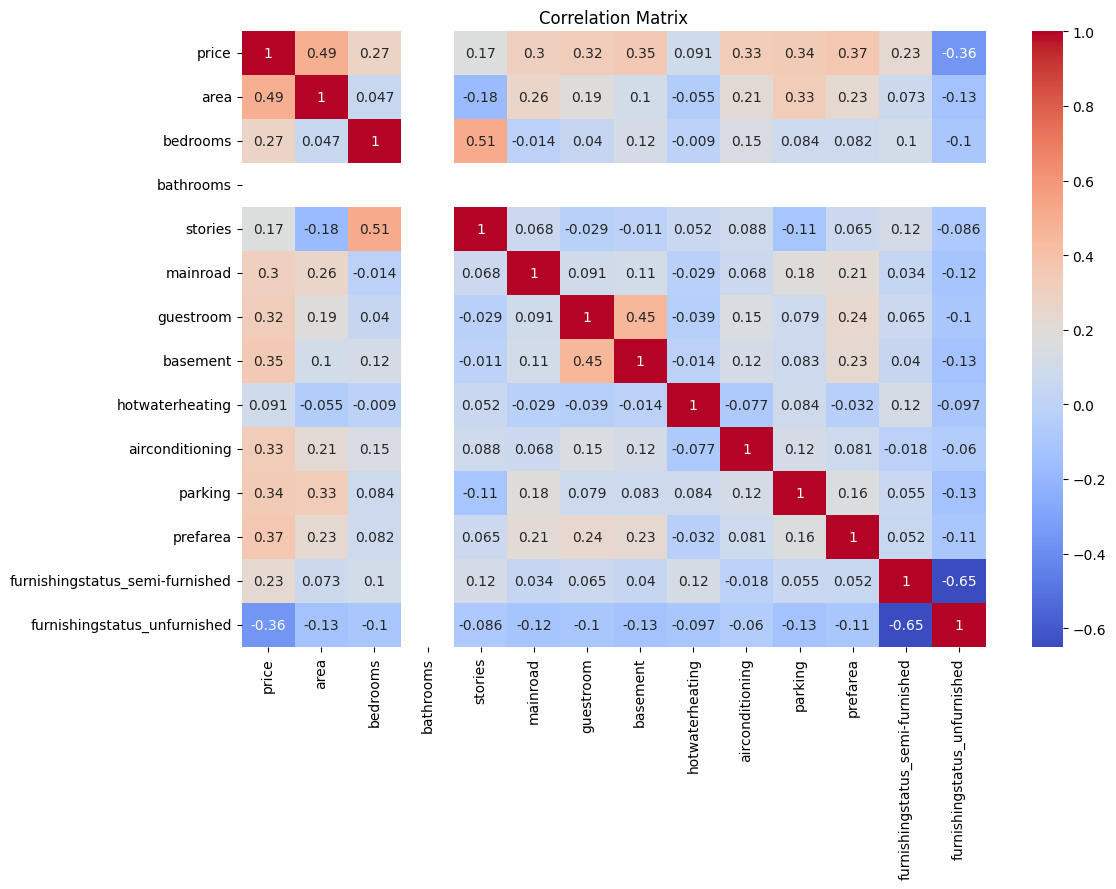

Relevant features based on correlation: ['area', 'bedrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


In [ ]:
# Compute correlation matrix
correlation_matrix = hu_df1.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Select features with correlation above a threshold with the target variable 'price'
threshold = 0.1  # Example threshold
relevant_features = correlation_matrix['price'][abs(correlation_matrix['price']) > threshold].index.tolist()
relevant_features.remove('price')  # Exclude the target variable itself
print("Relevant features based on correlation:", relevant_features)

 2. Random Forest Models

Relevant features based on tree model feature importance: ['area', 'bedrooms', 'basement', 'parking', 'prefarea', 'furnishingstatus_unfurnished']


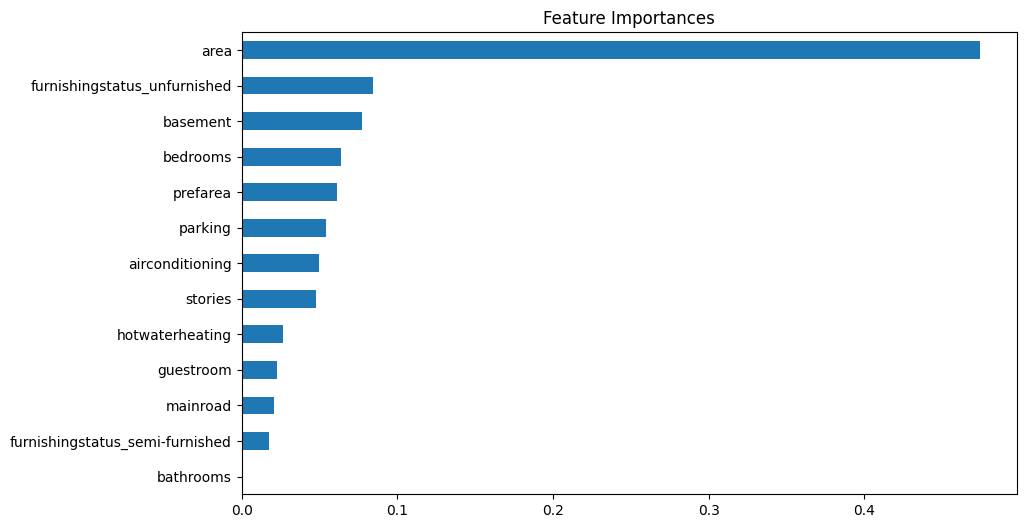

In [ ]:
# Define features (X) and target (y)
X = hu_df1.drop(columns=['price'])
y = hu_df1['price']

# Train a Random Forest Regressor
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
relevant_features_tree = feature_importances[feature_importances > 0.05].index.tolist()  # Example threshold of 5%
print("Relevant features based on tree model feature importance:", relevant_features_tree)

# Visualize feature importances
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importances")
plt.show()

3. Statistical Tests for Feature Relevance:

ANOVA for categorical features and Chi-Square for categorical target variables

In [ ]:
# Selecting categorical features to test
categorical_features = ['mainroad', 'guestroom', 'basement','hotwaterheating', 'airconditioning', 'prefarea']  # Use relevant categorical features
results = {}

for feature in categorical_features:
    # Perform ANOVA test
    f_val, p_val = f_classif(hu_df1[[feature]], hu_df1['price'])  # Assuming 'price' is the continuous target
    results[feature] = p_val[0]

# Print p-values for each feature
for feature, p_val in results.items():
    print(f"{feature}: p-value = {p_val}")
    if p_val < 0.05:  # Significance level of 5%
        print(f"{feature} is statistically significant.")
    else:
        print(f"{feature} is not statistically significant.")

mainroad: p-value = 0.11460978983713788
mainroad is not statistically significant.
guestroom: p-value = 0.0003107399838832644
guestroom is statistically significant.
basement: p-value = 0.001038122552678902
basement is statistically significant.
hotwaterheating: p-value = 0.048125021185784676
hotwaterheating is statistically significant.
airconditioning: p-value = 0.014901905323267208
airconditioning is statistically significant.
prefarea: p-value = 2.1005577074676162e-06
prefarea is statistically significant.


In [ ]:
# Encode categorical features and target if necessary
le = LabelEncoder()
categorical_data = hu_df1[categorical_features].apply(le.fit_transform)  # Apply encoding to each column
target_encoded = le.fit_transform(hu_df1['price'])  # Assuming 'price_category' is a categorical target

# Perform Chi-Square test
chi_scores, p_values = chi2(categorical_data, target_encoded)

# Print p-values for each feature
for i, feature in enumerate(categorical_features):
    print(f"{feature}: p-value = {p_values[i]}")
    if p_values[i] < 0.05:
        print(f"{feature} is statistically significant.")
    else:
        print(f"{feature} is not statistically significant.")

mainroad: p-value = 1.0
mainroad is not statistically significant.
guestroom: p-value = 0.1362609309786601
guestroom is not statistically significant.
basement: p-value = 0.8669910256076907
basement is not statistically significant.
hotwaterheating: p-value = 0.17467116247785835
hotwaterheating is not statistically significant.
airconditioning: p-value = 0.7629066189313318
airconditioning is not statistically significant.
prefarea: p-value = 0.1479294897533075
prefarea is not statistically significant.


In [ ]:
from sklearn.decomposition import PCA

# Scale data before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)
print("Number of components selected by PCA:", pca.n_components_)



Number of components selected by PCA: 11


In [ ]:
X_pca.shape

(365, 11)

**Model Training**

In [ ]:
# Assuming y is still the target variable, which hasn't been transformed by PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model on the PCA components
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error after PCA:", mse)
print("R-squared after PCA:", r2)


Mean Squared Error after PCA: 1042119457690.863
R-squared after PCA: 0.5115692348829121


**Visualization**

1. Scatter Plot of Actual vs. Predicted Values

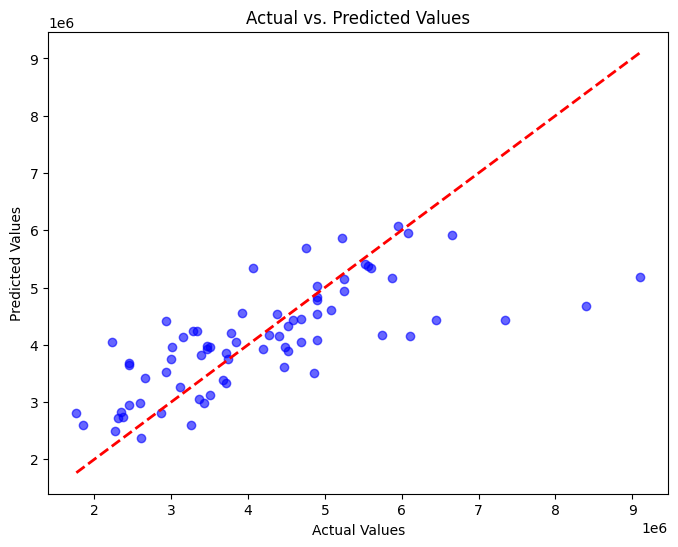

In [ ]:
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


2. Residual Plot

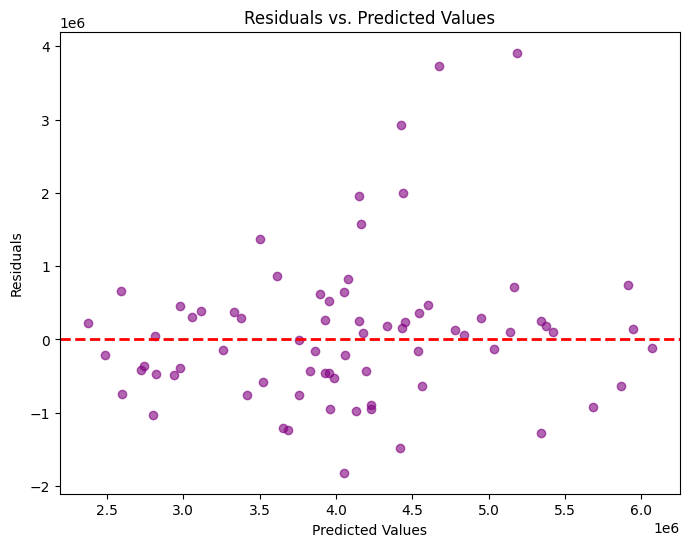

In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

3. Residual Plot

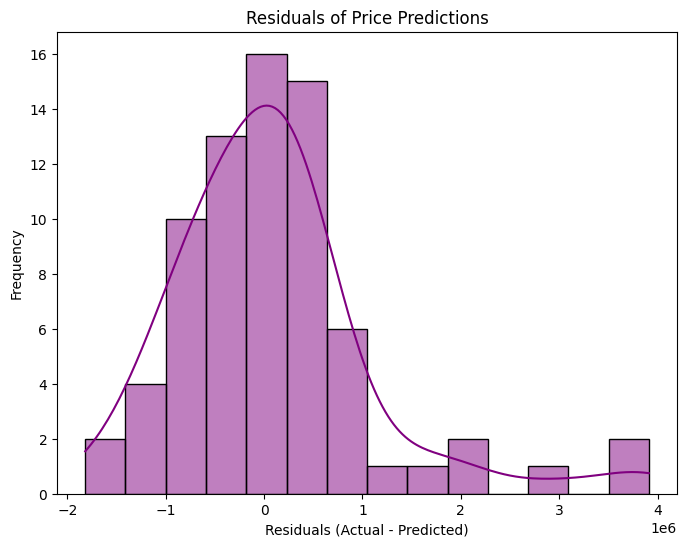

In [ ]:
# Residual Plot
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color="purple")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residuals of Price Predictions")
plt.show()

4. Distribution Plot of Actual and Predicted Prices

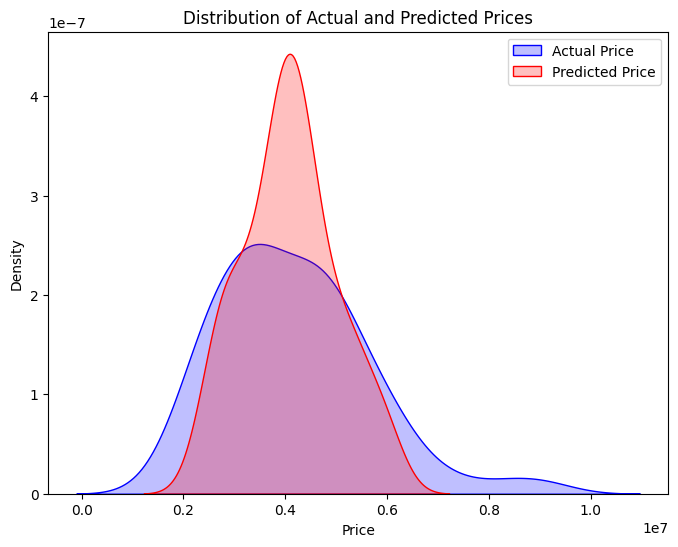

In [ ]:

# Distribution Plot of Actual and Predicted Prices
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label="Actual Price", color="blue", shade=True)
sns.kdeplot(y_pred, label="Predicted Price", color="red", shade=True)
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Prices")
plt.legend()
plt.show()